Importing the Dependencies

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Understanding

Dataset-https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx

In [52]:
df = pd.read_csv("Traffic_Crashes_Resulting_in_Injury-main.csv")
df.head()

C:\Users\surit\AppData\Local\Temp\ipykernel_12136\1090088467.py:1: DtypeWarning: Columns (4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_Crashes_Resulting_in_Injury-main.csv")


,id,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,accident_year,month,day_of_week,time_cat,juris,officer_id,reporting_district,beat_number,primary_rd,secondary_rd,distance,direction,weather_1,weather_2,collision_severity,type_of_collision,mviw,ped_action,road_surface,road_cond_1,road_cond_2,lighting,control_device,intersection,vz_pcf_code,vz_pcf_group,vz_pcf_description,vz_pcf_link,number_killed,number_injured,street_view,dph_col_grp,dph_col_grp_description,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,point,data_as_of,data_updated_at,data_loaded_at,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,22541,26470000,5903000.0,130374450,37.774953,-122.453139,SFPD-CROSSROADS,CITY STREET,5/7/2013 16:35,2013 May 07,16:35:00,2013,May,Tuesday,2:01 pm to 6:00 pm,3801,845,PARK DISTR,4K5F,FULTON ST,SHRADER ST,40.0,West,Cloudy,Not Stated,Injury (Complaint of Pain),Head-On,Other Motor Vehicle,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Daylight,Functioning,Midblock > 20ft,Unknown,Unknown,Unknown,Not Stated,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,AA,Vehicle(s) Only Involved,1.0,Driver,West,Making Right Turn,Driver,East,Stopped In Road,POINT (-122.45314 37.774952),NaN,NaN,3/25/2023 3:30,12.0,12.0,7.0,4.0,18.0
1,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,8968,24083000,NaN,130797608,37.757167,-122.416720,SFPD-CROSSROADS,CITY STREET,9/22/2013 1:15,2013 September 22,1:15:00,2013,September,Sunday,10:01 pm to 2:00 am,3801,1884,MISSION,902,VAN NESS AVE,21ST ST,0.0,Not Stated,Clear,Not Stated,Injury (Complaint of Pain),Rear End,Bicycle,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Dark - Street Lights,Functioning,Intersection <= 20ft,22350,22350,Unsafe speed for prevailing conditions,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,CC,Vehicle-Bicycle,1.0,Driver,North,Proceeding Straight,Bicyclist,North,Stopped In Road,POINT (-122.41672 37.757168),NaN,NaN,3/25/2023 3:30,53.0,53.0,3.0,2.0,20.0
2,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,18399,30756000,NaN,140070870,37.771886,-122.423397,SFPD-CROSSROADS,CITY STREET,1/24/2014 15:38,2014 January 24,15:38:00,2014,January,Friday,2:01 pm to 6:00 pm,3801,441,NaN,4B7F,MARKET ST,OCTAVIA ST,0.0,Not Stated,Clear,Not Stated,Injury (Complaint of Pain),Broadside,Bicycle,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Daylight,Functioning,Intersection <= 20ft,22450(a),22450(a),Failure to stop at STOP sign,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,CC,Vehicle-Bicycle,NaN,Bicyclist,South,Making Left Turn,Driver,Not Stated,Not Stated,POINT (-122.42339 37.771885),NaN,NaN,3/25/2023 3:30,32.0,32.0,1.0,5.0,20.0
3,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,44333,27966000,6435101.0,170778743,37.769543,-122.510739,SFPD-CROSSROADS,CITY STREET,9/23/2017 22:02,2017 September 23,22:02:00,2017,September,Saturday,10:01 pm to 2:00 am,3801,449,RICHMOND,3G15E,GREAT HWY,JOHN F KENNEDY DR,329.0,South,Clear,Not Stated,Injury (Other Visible),Overturned,Fixed Object,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Not Stated,None,Midblock > 20ft,23152(a),23152(a-g),Driving under influence of alcohol and/or drugs,http://leginfo.legislature.ca.gov/faces/codes_...,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,AA,Vehicle(s) Only Involved,1.0,Driver,South,Ran Off Road,NaN,NaN,NaN,POINT (-122.51074 37.769543),NaN,NaN,3/25/2023 3:30,9.0,9.0,8.0,4.0,12.0
4,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,50283,27286000,316000.0,190787940,37.782518,-122.464393,SFPD-INTERIM DB,CITY STREET,10/19/2019 9:29,2019 October 19,9:29:00,2019,Octo

In [4]:
df.shape

(55300, 61)

In [8]:
df.columns

Index(['id', 'unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       

In [22]:
df.collision_severity.value_counts()

Injury (Complaint of Pain)    35169
Injury (Other Visible)        15802
Injury (Severe)                3812
Fatal                           516
Medical                           1
Name: collision_severity, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55300 entries, 0 to 55299
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            55300 non-null  object 
 1   unique_id                     55300 non-null  int64  
 2   cnn_intrsctn_fkey             55300 non-null  float64
 3   cnn_sgmt_fkey                 24932 non-null  float64
 4   case_id_pkey                  55300 non-null  object 
 5   tb_latitude                   55153 non-null  float64
 6   tb_longitude                  55153 non-null  float64
 7   geocode_source                55300 non-null  object 
 8   geocode_location              55300 non-null  object 
 9   collision_datetime            55292 non-null  object 
 10  collision_date                55300 non-null  object 
 11  collision_time                55244 non-null  object 
 12  accident_year                 55300 non-null  int64  
 13  m

In [53]:
df.drop(columns=['intersection','id','unique_id','case_id_pkey','collision_time','collision_datetime','collision_date','vz_pcf_link','street_view','point','data_as_of','data_updated_at','data_loaded_at'],inplace=True)

In [54]:
df.head()

,cnn_intrsctn_fkey,cnn_sgmt_fkey,tb_latitude,tb_longitude,geocode_source,geocode_location,accident_year,month,day_of_week,time_cat,juris,officer_id,reporting_district,beat_number,primary_rd,secondary_rd,distance,direction,weather_1,weather_2,collision_severity,type_of_collision,mviw,ped_action,road_surface,road_cond_1,road_cond_2,lighting,control_device,vz_pcf_code,vz_pcf_group,vz_pcf_description,number_killed,number_injured,dph_col_grp,dph_col_grp_description,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,26470000,5903000.0,37.774953,-122.453139,SFPD-CROSSROADS,CITY STREET,2013,May,Tuesday,2:01 pm to 6:00 pm,3801,845,PARK DISTR,4K5F,FULTON ST,SHRADER ST,40.0,West,Cloudy,Not Stated,Injury (Complaint of Pain),Head-On,Other Motor Vehicle,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Daylight,Functioning,Unknown,Unknown,Unknown,0.0,1,AA,Vehicle(s) Only Involved,1.0,Driver,West,Making Right Turn,Driver,East,Stopped In Road,12.0,12.0,7.0,4.0,18.0
1,24083000,NaN,37.757167,-122.416720,SFPD-CROSSROADS,CITY STREET,2013,September,Sunday,10:01 pm to 2:00 am,3801,1884,MISSION,902,VAN NESS AVE,21ST ST,0.0,Not Stated,Clear,Not Stated,Injury (Complaint of Pain),Rear End,Bicycle,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Dark - Street Lights,Functioning,22350,22350,Unsafe speed for prevailing conditions,0.0,1,CC,Vehicle-Bicycle,1.0,Driver,North,Proceeding Straight,Bicyclist,North,Stopped In Road,53.0,53.0,3.0,2.0,20.0
2,30756000,NaN,37.771886,-122.423397,SFPD-CROSSROADS,CITY STREET,2014,January,Friday,2:01 pm to 6:00 pm,3801,441,NaN,4B7F,MARKET ST,OCTAVIA ST,0.0,Not Stated,Clear,Not Stated,Injury (Complaint of Pain),Broadside,Bicycle,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Daylight,Functioning,22450(a),22450(a),Failure to stop at STOP sign,0.0,1,CC,Vehicle-Bicycle,NaN,Bicyclist,South,Making Left Turn,Driver,Not Stated,Not Stated,32.0,32.0,1.0,5.0,20.0
3,27966000,6435101.0,37.769543,-122.510739,SFPD-CROSSROADS,CITY STREET,2017,September,Saturday,10:01 pm to 2:00 am,3801,449,RICHMOND,3G15E,GREAT HWY,JOHN F KENNEDY DR,329.0,South,Clear,Not Stated,Injury (Other Visible),Overturned,Fixed Object,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Not Stated,None,23152(a),23152(a-g),Driving under influence of alcohol and/or drugs,0.0,1,AA,Vehicle(s) Only Involved,1.0,Driver,South,Ran Off Road,NaN,NaN,NaN,9.0,9.0,8.0,4.0,12.0
4,27286000,316000.0,37.782518,-122.464393,SFPD-INTERIM DB,CITY STREET,2019,October,Saturday,6:01 am to 10:00 am,3801,2456,Richmond,NaN,06TH AVE,CLEMENT ST,154.0,South,Clear,Not Stated,Injury (Complaint of Pain),Hit Object,Fixed Object,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Daylight,None,22102,22102,Illegal U-turn in business district,0.0,1,AA,Vehicle(s) Only Involved,1.0,Driver,West,Making U Turn,NaN,NaN,NaN,5.0,5.0,8.0,4.0,11.0


In [41]:
df.shape

(55300, 50)

In [48]:
print(df.dtypes)

cnn_intrsctn_fkey                 int64
cnn_sgmt_fkey                   float64
tb_latitude                     float64
tb_longitude                    float64
geocode_source                   object
geocode_location                 object
accident_year                     int64
month                            object
day_of_week                      object
time_cat                         object
juris                            object
officer_id                       object
reporting_district               object
beat_number                      object
primary_rd                       object
secondary_rd                     object
distance                        float64
direction                        object
weather_1                        object
weather_2                        object
collision_severity               object
type_of_collision                object
mviw                             object
ped_action                       object
road_surface                     object


In [51]:
df.intersection.dtype

dtype('O')

Correlation Heatmap

C:\Users\surit\AppData\Local\Temp\ipykernel_12136\4227227602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


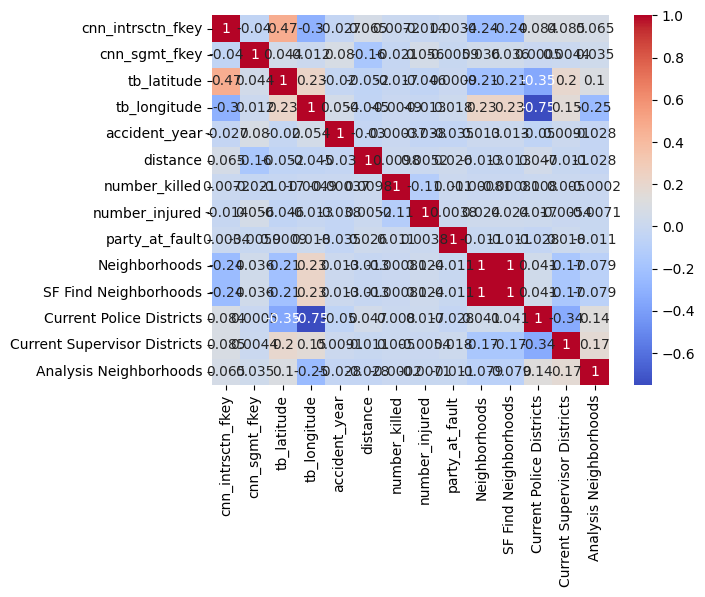

In [43]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder

# # text_cols = df.select_dtypes(include=['object']).columns
# for col in text_cols:
le = LabelEncoder()
df['col'] = le.fit_transform(df[col])


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']